In [99]:
import numpy as np 
from scipy.special import factorial
from scipy.special import gamma

import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

In [100]:
np.random.seed(42)

In [150]:
samples = []
samples_size = [10, 50, 100]

likelihoods = []

thetas = np.array([5])
theta_field_variation = np.linspace(0, 2, 100)

gamma_inital_values = np.array([[1,1], [2,5], [2, 0.5]])
gammas = []

In [151]:
for s in samples_size:
    samples.append(np.random.poisson(1, s))

In [152]:
def likelihood(sample, o):
    return o**(np.sum(sample))*np.exp(-len(sample)*o)/np.prod(factorial(sample))

In [153]:
def gamma_distribution(x, a, b):
    
    return b**a*x**(a-1)*np.exp(-b*x)/gamma(a)

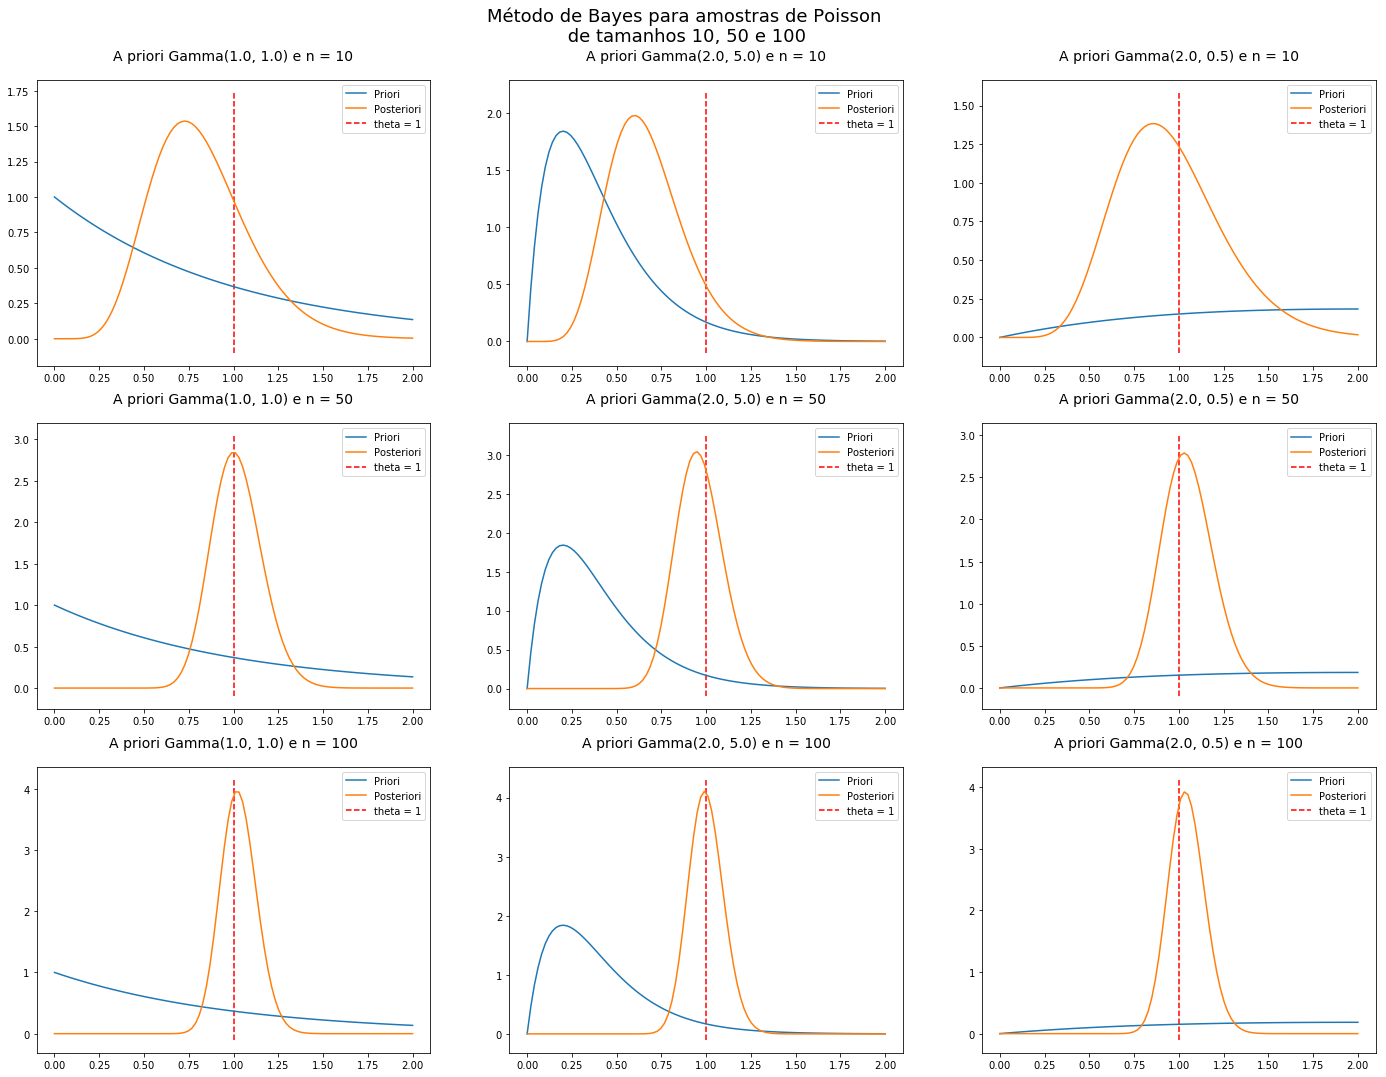

In [156]:
fig, axis = plt.subplots(3, 3, figsize = (24, 17))
fig.subplots_adjust(top=0.92) 

fig.suptitle(f'Método de Bayes para amostras de Poisson\n de tamanhos 10, 50 e 100', fontsize = 18)

for sample, axe_l in zip(samples, axis):
    
    for [a, b], axe in zip(gamma_inital_values, axe_l):
    
        s = np.array(sample)
        n = s.shape[0]

        axe.set_title(f'A priori Gamma({a}, {b}) e n = {n}', fontsize = 14)

        gpri =  gamma_distribution(theta_field_variation, a, b)
        gpos =  gamma_distribution( theta_field_variation ,a + n*s.mean(), b + n)

        axe.plot(theta_field_variation, gpri, label = f'Priori')
        axe.plot(theta_field_variation, gpos, label = f'Posteriori')

        axe.vlines(1,-0.1, gpos.max()+0.2, linestyles = '--', color = 'r', label = f'theta = 1')

        axe.legend()
        
plt.savefig(f"atv_1", dpi=150)